# Exploratory Data Analysis

In [1]:
# install necessary packages
%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import necessary packages
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sweetviz as sv

import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

In [3]:
# import the dataset and read as a pandas dataframe
df = pd.read_csv('C:/Users/4YouSee/Desktop/personal_work/fraud-detection/data/dataset.csv')

In [4]:
# divide data into train and test to avoid data snooping bias
train_set, test_set = train_test_split(df, test_size=0.15, random_state=42)

## 1 - Univariate Data Analysis

Here let's see a few basic things about the dataset in general, such as: first entries, data types, missing values.

In [5]:
# see the five first entries
train_set.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
135020,4,0.8009,10969.47,23.0,0.272632,30.0,BR,12,Gel Cola Pierry Lohan Caixa Com 24 Unidades 250g,cat_be0af8e,0.300913,1937.0,54.0,1,NaN,N,2020-04-16 8:19:52,18.23,2,0
144276,4,0.4572,199058.91,1.0,0.387058,0.0,AR,5,Balde Centrifugo Dispenser Desagote C/ Ruedas ...,cat_c514e15,0.280518,3158.0,2.0,1,NaN,N,2020-04-16 21:17:53,16.85,29,0
141817,4,0.4132,854.18,50.0,0.000000,39.0,AR,4,Reloj Swatch Yws400 Trueville Cuero Acero Cale...,cat_659929a,0.576154,2922.0,809.0,1,NaN,Y,2020-04-16 3:26:22,230.20,34,0
34211,4,0.8187,9271.37,43.0,0.000000,2.0,BR,3,Mochila Nike Brasilia 9.0 24 Litros (original)...,cat_b50d9ab,0.178026,2244.0,282.0,1,Y,Y,2020-04-09 10:33:03,26.52,37,0
126067,4,NaN,NaN,6.0,0.000000,7.0,BR,20,Controle Lg Akb75055701 Akb74915319 Akb7447540...,cat_d018e12,0.333070,3167.0,41.0,1,NaN,N,2020-03-09 18:49:09,20.00,3,0


In [6]:
# see general info about variables
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127500 entries, 135020 to 121958
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              127500 non-null  int64  
 1   score_2              116500 non-null  float64
 2   score_3              116500 non-null  float64
 3   score_4              127186 non-null  float64
 4   score_5              127500 non-null  float64
 5   score_6              127492 non-null  float64
 6   pais                 127343 non-null  object 
 7   score_7              127500 non-null  int64  
 8   produto              127500 non-null  object 
 9   categoria_produto    127500 non-null  object 
 10  score_8              127500 non-null  float64
 11  score_9              127492 non-null  float64
 12  score_10             127186 non-null  float64
 13  entrega_doc_1        127500 non-null  int64  
 14  entrega_doc_2        34918 non-null   object 
 15  entrega_doc_

So far, what variables have you identified that are qualitative and quantitative?

List of qualitative variables: fraude, score_1, pais, produto, categoria_produto, entrega_doc_1, entrega_doc_2, entrega_doc_3

List of quantitative variables: score_2, score_3, score_4, score_5, score_6, score_7, score_8, score_9, score_10, valor_compra, score_fraude_modelo

### 1.1 - Data Visualization and Frequency Distribuition

For data visualization, the idea is to try to answer some questions such as:

1. How often does each value (or range of values) appear in the data set, that is, what is the **frequency distribution** of the data?
2. Can the frequency distribution of the data be considered symmetric?

In this context, one of the objectives of exploratory analysis is to organize and display the data appropriately and for this we use:

1. Graphs and tables

### 1.2 - Measures Summary/Analyzing data

With summary measures, the idea is to try to answer the following questions:

1. What are some typical data set values, such as minimum and maximum?
2. What would be a value to represent the central position (or location) of the data set?
3. What would be a measure of the variability or dispersion of the data?
4. Are there outliers or outliers in the data set?

In this context, one of the objectives of exploratory analysis is to organize and display the data appropriately and for this we use:

1. Summary measures

### 1.3 - Data Distribution

Offering a single synthesis for a distribution is not enough, we need to have an idea of the dispersion, sometimes known as variability. We have several ways to do this, for example:

* Amplitude is a simple choice, but very sensitive to extreme values.
* The interquartile range is a robust measure (not affected by extreme values).
* Standard deviation is a widely used measure of dispersion. It is the most complex from a technical point of view, and appropriate for well-behaved symmetric data, since it is also unduly influenced by very discrepant values.


Until item 1.3, instead of doing everything manually, this can be a bit laborious, depending on the context, you can use libraries like [sweetviz](https://pypi.org/project/sweetviz/) or [pandas-profiling](https://pypi.org/project/pandas-profiling/) to help you.

In [7]:
feature_config = sv.FeatureConfig(force_text=['produto', 'categoria_produto'])
my_report = sv.analyze(train_set, 'fraude', feature_config)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 2 - Bivariate Data Analysis

Here we will deal with the descriptive analysis of the **association** between two variables. **In general, we say that there is an association between two variables if knowledge of the value of one of them gives us some information about some characteristic of the distribution (of frequencies) of the other.**

*We can highlight three cases:*

1. both variables are qualitative.
2. both variables are quantitative.
3. one variable is qualitative and the other is quantitative.

### 2.1 - Two qualitative variables

Here the idea is to check the correlation between two qualitative variables.

In [8]:
qualitative_variables = [
    'fraude', 'score_1', 'pais', 'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3'
]

In [31]:
def chi_sq_test(cross_tabs):
    """
    Prints the Chi-Squared Statistic, p-value, degress of freedom from a Chi-Squared test,
    and Tschuprow coefficient
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    chi2, p, dof, con_table = stats.chi2_contingency(cross_tabs)
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')
    print('Tschuprow coefficient:', association(cross_tabs, method='tschuprow'))

In [33]:
# qualitative associations with the label
for var in qualitative_variables:
    print('The qualitative variable is:', var)
    
    # Create a contingency table
    tabs = pd.crosstab(train_set['fraude'], train_set[var])
    
    # Add labels to the contingency table
    tabs.columns = [f'{var}_{col}' for col in tabs.columns]
    tabs.index = ['fraude_0', 'fraude_1']
    
    # Display the contingency table
    print('Contingency table:')
    print(tabs)
    
    # Perform the chi-squared test and display the results
    chi_sq_test(tabs)
    
    print('------------------------------------------------------------------------------------------')


The qualitative variable is: fraude
Contingency table:
          fraude_0  fraude_1
fraude_0    121147         0
fraude_1         0      6353
chi-squared = 127478.8791757156
p value= 0.0
degrees of freedom = 1
Tschuprow coefficient: 0.9999999999999999
------------------------------------------------------------------------------------------
The qualitative variable is: score_1
Contingency table:
          score_1_1  score_1_2  score_1_3  score_1_4
fraude_0       3246      11253       2210     104438
fraude_1        336        935        215       4867
chi-squared = 474.51669088511136
p value= 1.5885026971171421e-102
degrees of freedom = 3
Tschuprow coefficient: 0.046354333445286215
------------------------------------------------------------------------------------------
The qualitative variable is: pais
Contingency table:
          pais_AD  pais_AE  pais_AR  pais_AU  pais_BE  pais_BR  pais_BS  \
fraude_0        1        2    26232        3        3    89570        1   
fraude_1       

In [11]:
# qualitative associations between "entrega_doc_" variables
tabs2 = pd.crosstab(train_set['entrega_doc_1'], train_set['entrega_doc_2'])
chi_sq_test(tabs2)

chi-squared = 6175.456447671633
p value= 0.0
degrees of freedom = 1
Tschuprow coefficient: 0.42063365210648473


In [12]:
# qualitative associations
tabs3 = pd.crosstab(train_set['entrega_doc_1'], train_set['entrega_doc_3'])
chi_sq_test(tabs3)

chi-squared = 16289.863073618646
p value= 0.0
degrees of freedom = 1
Tschuprow coefficient: 0.35746695241165233


In [13]:
# qualitative associations
tabs4 = pd.crosstab(train_set['entrega_doc_2'], train_set['entrega_doc_3'])
chi_sq_test(tabs4)

chi-squared = 3550.3247559557476
p value= 0.0
degrees of freedom = 1
Tschuprow coefficient: 0.31892514804700034


Some conclusions:

* We will eliminate the variables "score_1" and "parents", as they do not present a high correlation with the target variable, that is, they probably do not have very good predictive power.
* Talking about the correlation coefficients between the independent variables ("entrega_doc_"), none have a very high correlation (>= 0.70), therefore, I will rule out the presence of multicollinearity between them.

The rest of the variables will initially be maintained.

### 2.2 - Two quantitative variables

Here the idea is to check the correlation between two quantitative variables.

In [14]:
quantitative_variables = [
    'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'valor_compra', 'score_fraude_modelo'
]

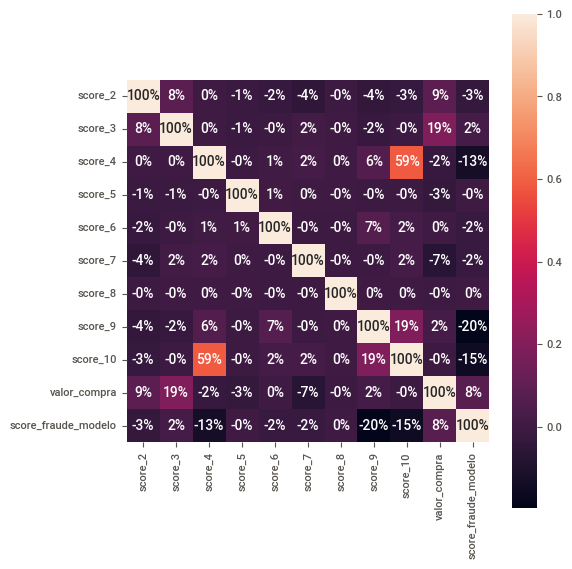

In [15]:
# quantitative associations
quantitative_df = train_set[quantitative_variables]
corr = quantitative_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

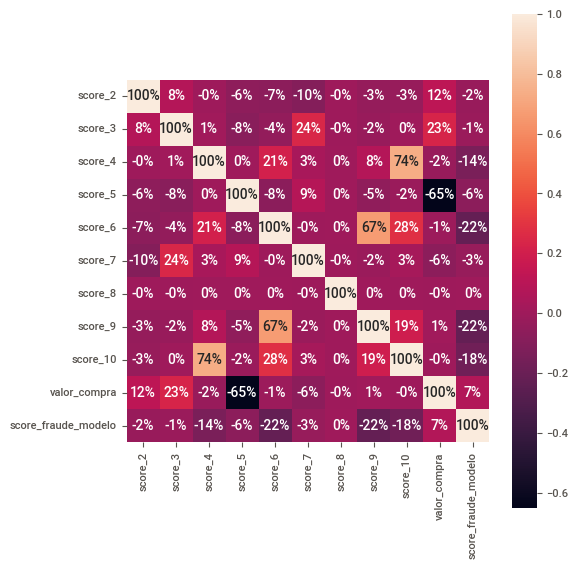

In [16]:
# quantitative associations
corr2 = quantitative_df.corr(method='spearman')
plt.figure(figsize=(6,6))
sns.heatmap(corr2, fmt='.0%', annot=True, square=True)
plt.tight_layout()

From the Pearson correlation, few variables appeared to be highly correlated, but when plotting using the Spearman method, we see many highly correlated variables and several possible collinearities. Let's check this collinearity with the VIF metric and that could possibly be an indication for feature selection.

The second metric for gauging multicollinearity is the variance inflation factor (VIF). The VIF directly measures the ratio of the variance of the entire model to the variance of a model with only the feature in question.

In layman’s terms, it gauges how much a feature’s inclusion contributes to the overall variance of the coefficients of the features in the model.

A VIF of 1 indicates that the feature has no correlation with any of the other features.

Typically, a VIF value exceeding 5 or 10 is deemed to be too high. Any feature with such VIF values is likely to be contributing to multicollinearity.

In [17]:
# Compute VIF data for each independent variable
clean_quantitative_df = quantitative_df.dropna()
vif = pd.DataFrame()
vif["features"] = clean_quantitative_df.columns
vif["vif_Factor"] = [variance_inflation_factor(clean_quantitative_df.values, i) for i in range(clean_quantitative_df.shape[1])]
vif

,features,vif_Factor
0,score_2,8.824453
1,score_3,1.140583
2,score_4,3.307715
3,score_5,1.007351
4,score_6,1.009078
5,score_7,1.948429
6,score_8,3.705330
7,score_9,2.816934
8,score_10,2.967546
9,valor_compra,1.302186


We see that the variable "score_2" has the highest VIF and therefore, it may be a variable to eliminate in the modeling that we will do later.

### 2.3 - One qualitative and one quantitative variable

Here the idea is to check the correlation between the qualitative and quantitative variable.

The quantitative variable is: score_2
        min  max      mean       var       std
fraude                                        
0       0.0  1.0  0.726815  0.017412  0.131954
1       0.0  1.0  0.750679  0.023035  0.151772


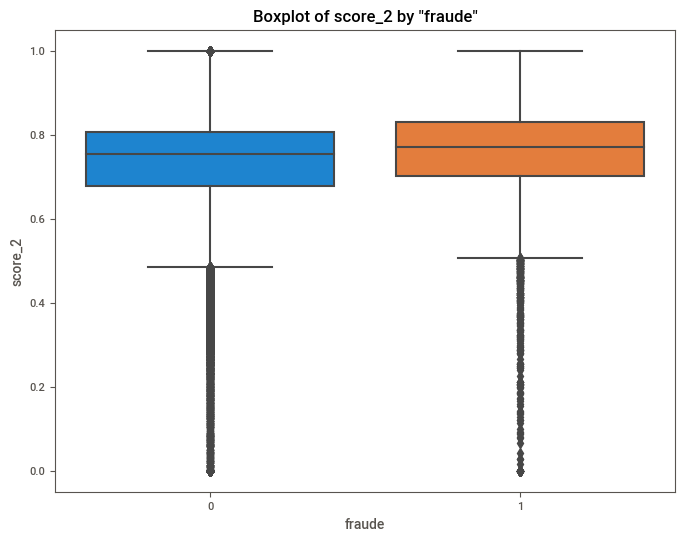

------------------------------------------------------------------------------------------
The quantitative variable is: score_3
         min          max           mean           var           std
fraude                                                              
0       0.16  13875647.01  253355.386410  6.889205e+11  8.300123e+05
1       1.14  13878743.71  388015.888665  1.215286e+12  1.102400e+06


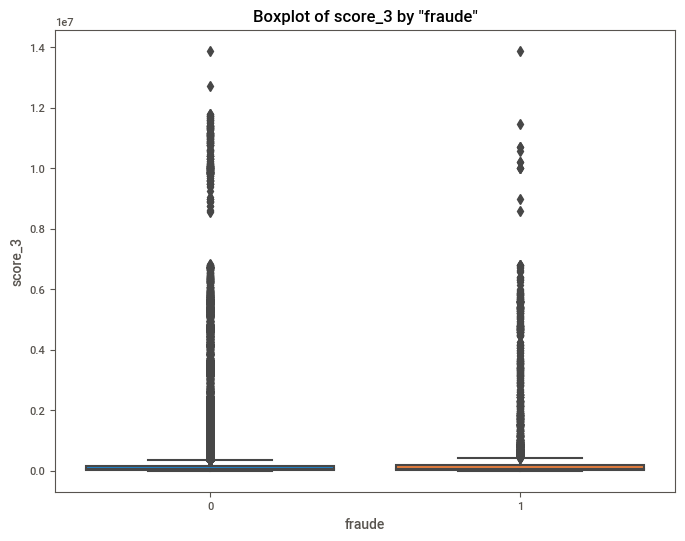

------------------------------------------------------------------------------------------
The quantitative variable is: score_4
        min   max       mean         var        std
fraude                                             
0       0.0  50.0  22.039973  404.195288  20.104609
1       0.0  50.0  14.903129  324.022699  18.000631


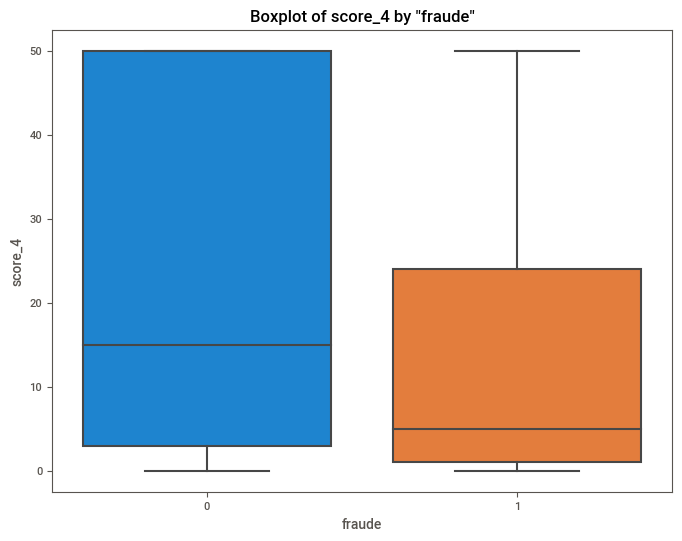

------------------------------------------------------------------------------------------
The quantitative variable is: score_5
        min         max      mean       var       std
fraude                                               
0       0.0  833.333333  0.223202  7.243107  2.691302
1       0.0   32.800000  0.196248  0.431408  0.656816


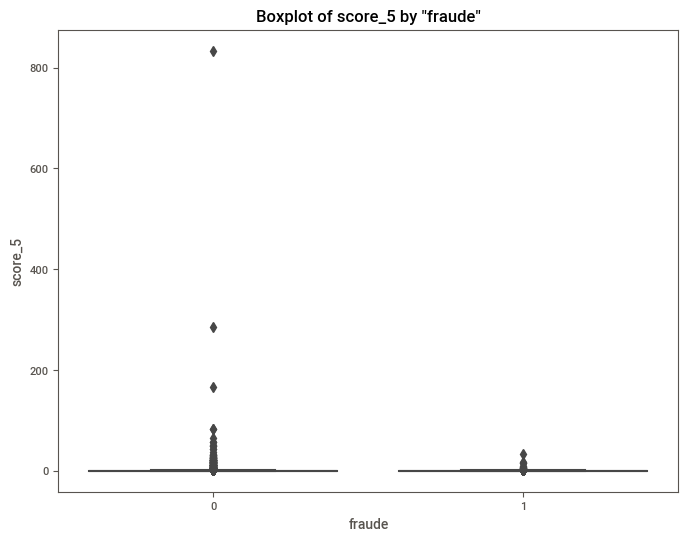

------------------------------------------------------------------------------------------
The quantitative variable is: score_6
        min       max       mean            var         std
fraude                                                     
0      -4.0  145274.0  52.460677  576140.337825  759.039088
1      -4.0   10922.0  19.761373   47378.750038  217.666603


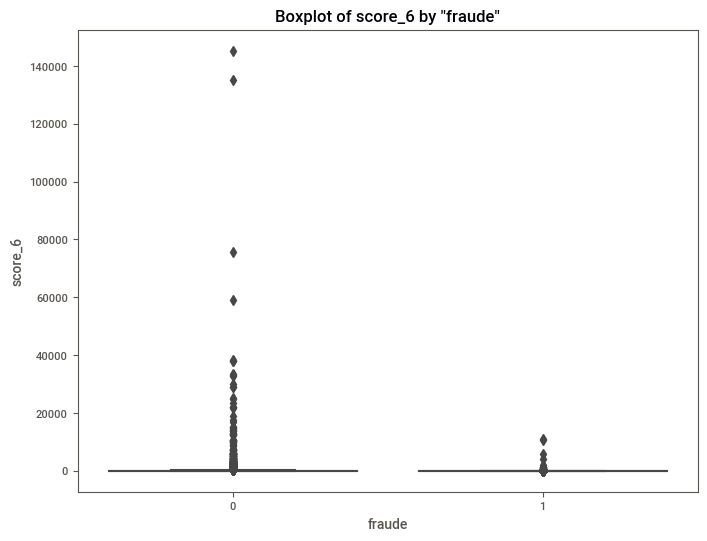

------------------------------------------------------------------------------------------
The quantitative variable is: score_7
        min  max       mean         var        std
fraude                                            
0         0   58  14.299124  201.286962  14.187564
1         0   57  12.096332  181.325416  13.465713


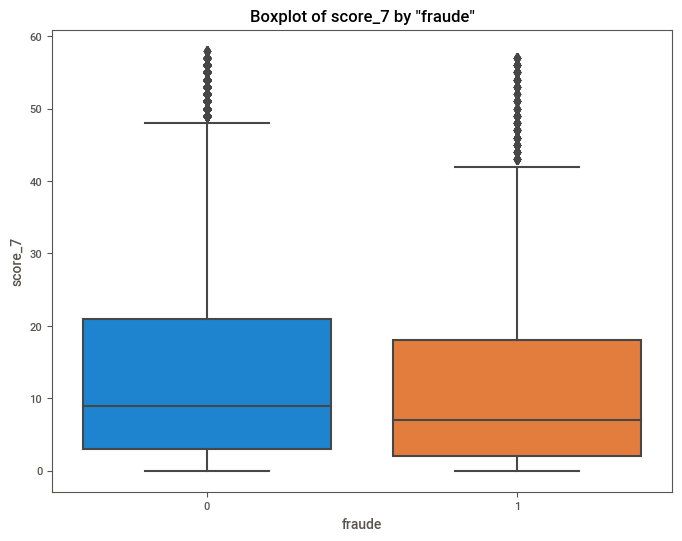

------------------------------------------------------------------------------------------
The quantitative variable is: score_8
             min       max      mean       var       std
fraude                                                  
0       0.000004  0.999995  0.496667  0.083088  0.288249
1       0.000335  0.999610  0.501102  0.083209  0.288459


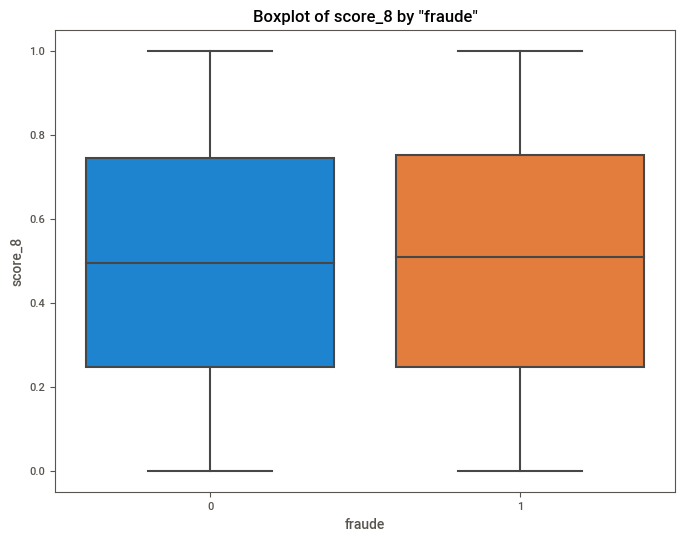

------------------------------------------------------------------------------------------
The quantitative variable is: score_9
        min     max         mean           var          std
fraude                                                     
0       0.0  7544.0  2352.172826  2.931245e+06  1712.088016
1       0.0  7372.0  1427.971982  2.220739e+06  1490.214447


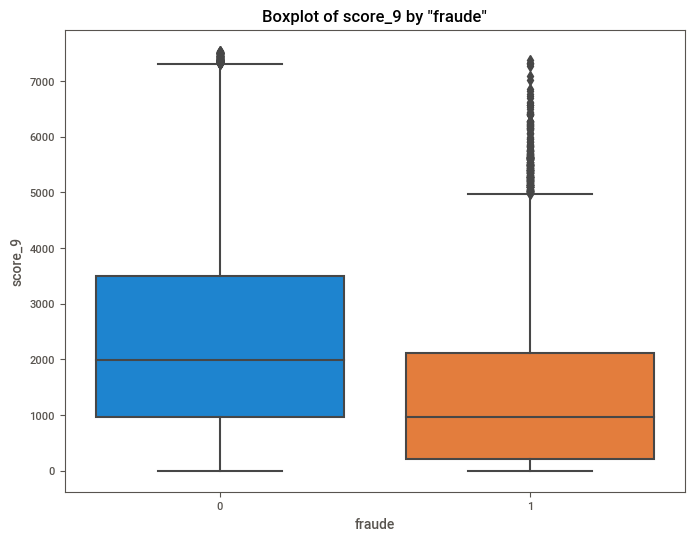

------------------------------------------------------------------------------------------
The quantitative variable is: score_10
        min     max        mean            var         std
fraude                                                    
0       0.0  2215.0  307.302065  104717.588071  323.600970
1       0.0  1890.0  169.935525   62432.824987  249.865614


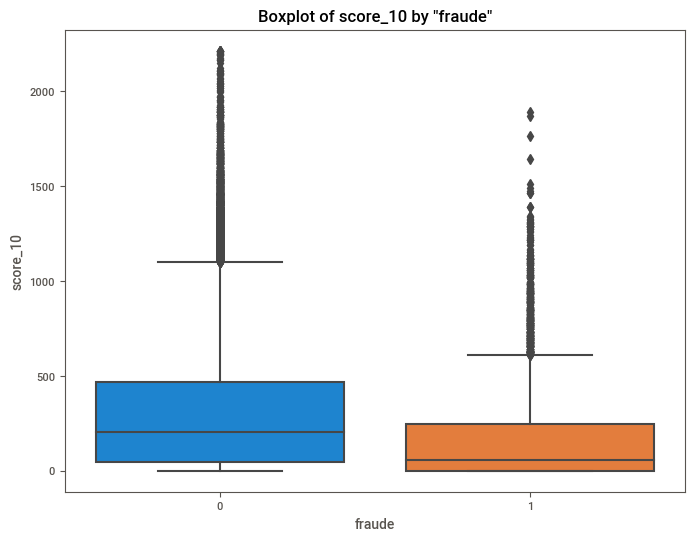

------------------------------------------------------------------------------------------
The quantitative variable is: valor_compra
         min      max       mean           var         std
fraude                                                    
0       0.02  3696.35  42.093969   7426.810244   86.178943
1       0.21  3424.81  72.719230  26470.422898  162.697335


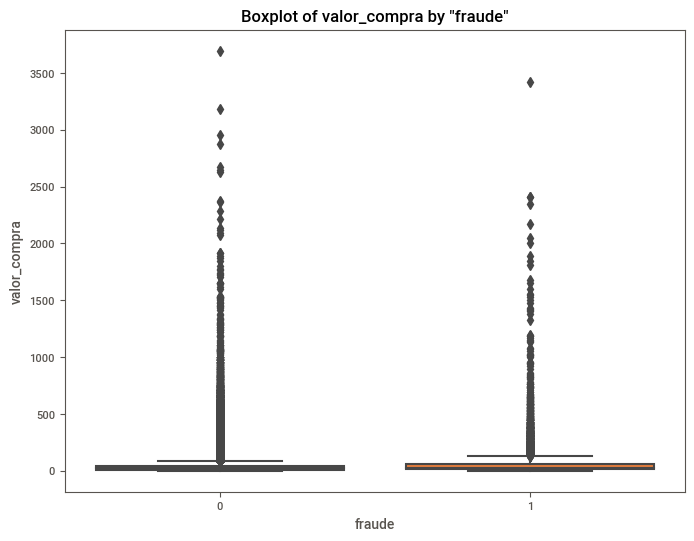

------------------------------------------------------------------------------------------
The quantitative variable is: score_fraude_modelo
        min  max       mean          var        std
fraude                                             
0         0  100  46.933824   804.723412  28.367647
1         0  100  69.846844  1031.714103  32.120307


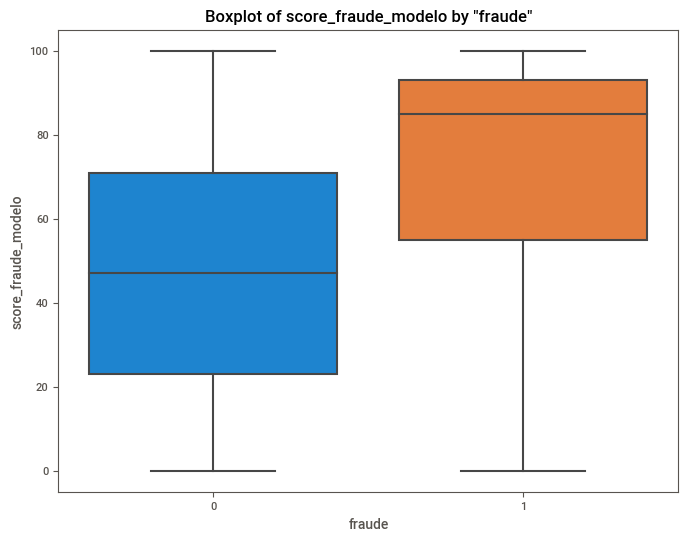

------------------------------------------------------------------------------------------


In [19]:
# Summary measures for quantitative independent features and label to search for relationships
for var in quantitative_variables:
    print('The quantitative variable is:', var)
    print(train_set.groupby('fraude')[var].agg(['min', 'max', 'mean', 'var', 'std']))
    # Create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='fraude', y=var, data=train_set)
    plt.title(f'Boxplot of {var} by "fraude"')
    plt.xlabel('fraude')
    plt.ylabel(var)
    plt.show()
    print('------------------------------------------------------------------------------------------')

Some conclusions:

* The variable "score_2" presented a high VIF, and does not have a large variability in relation to the target variable, in this case we will eliminate it in a later step.
* The variable "score_5" presented a high Spearman correlation in relation to the variable "valor_compra", in addition to presenting some extreme values ​​that could confuse the model. In this case, we will also remove it from the model. And it also does not have great variability in relation to the target variable.
* The variable "score_6" has some outliers that we should perhaps remove.
* The variables "score_7" and "score_8" do not present great variability in relation to the target variable, in this case, they will also be removed.

The rest of the variables will initially be maintained.

Going a little deeper into this stage, which until now has been very visual, we can do hypothesis tests to compare averages, the idea is to know:

> Is there a difference between the average of the quantitative variables between fraud and non-fraud?

With this test, we will have enough statistical evidence to know whether a quantitative variable actually brings information to predict the target variable or not.

If the means are not different, we conclude that this variable does not add much information to the prediction of the variable, if they are different, we conclude that this variable adds information to the prediction.

In [27]:
for var in quantitative_variables:
    print('The quantitative variable is:', var)
    
    # Separate the data into two groups: fraud and non-fraud and remove missing values
    fraud_group = train_set[train_set['fraude'] == 1][var].dropna()
    non_fraud_group = train_set[train_set['fraude'] == 0][var].dropna()
    
    # Perform the Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(fraud_group, non_fraud_group)
    
    # Print the results of the Mann-Whitney U test
    print(f'Mann-Whitney U test for {var}:')
    print(f'Statistic: {statistic}')
    print(f'P-value: {p_value}')
    
    if p_value < 0.05:  # Define an appropriate significance level
        print('There is a statistically significant difference in the medians.')
    else:
        print('There is no statistically significant difference in the medians.')
    
    print('------------------------------------------------------------------------------------------')

The quantitative variable is: score_2
Mann-Whitney U test for score_2:
Statistic: 352970119.0
P-value: 7.304160439897247e-58
There is a statistically significant difference in the medians.
------------------------------------------------------------------------------------------
The quantitative variable is: score_3
Mann-Whitney U test for score_3:
Statistic: 321872303.5
P-value: 0.0006066030916084614
There is a statistically significant difference in the medians.
------------------------------------------------------------------------------------------
The quantitative variable is: score_4
Mann-Whitney U test for score_4:
Statistic: 294841224.0
P-value: 2.2312942954264575e-212
There is a statistically significant difference in the medians.
------------------------------------------------------------------------------------------
The quantitative variable is: score_5
Mann-Whitney U test for score_5:
Statistic: 358968214.5
P-value: 3.85367136586377e-21
There is a statistically significa


According to the tests, only the variable "score_8" did not show significant differences in the median, in this case, we will slightly change the conclusions drawn above:

* We will keep the "score_5" variable, we will just be careful to try to remove some outliers, just like in the "score_6" variable.
* We will only delete the "score_8" variable. We will keep the variable "score_7".

The rest we will maintain the same decision.

## 3 - Multivariate Data Analysis

Although it is possible to consider each variable separately and apply the techniques described in the previous topics, the analysis of the relationship between them needs to be evaluated jointly, as the appropriate probabilistic models for this type of data involve joint distributions for the p variables, say, X1, …, Xp, under investigation.

**Here are some useful graphs for analyzing multivariate data:**

* Draftsman’s display
* Symbolic scatterplot
* Average profile chart
* Multivariate summary measures (example → heatmap correlation chart)
* Multiple input contingency tables